<a href="https://colab.research.google.com/github/zzozzo/Datathon/blob/main/ohjihoon_copythecode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

제가 맡은 일에 대해 정리한 것들 입니다.

- 3D 산점도를 이용한 상관 관계 분석해서 가설을 성립, 인 사이트 도출
    - 나이 분류, 지역 분류, 성별 분류, 월 단위 분류
    - 3D 산점도 사용, 선 그래프 사용

- **날짜에 따른 지역별 확진자 수 현황**
    - 지역 분류, 성별, 나이 고려 할 것인지 정해야함. 월 단위로 할 건지 정해야함.
    - 선 그래프 사용

- **나이대 및 성별 누적 확진자수**
    - 성별, 나이 분류,
    - 월별 누적인지, 총 합 누적 값인지 정해야함.`cumsum()`: 누적 합을 계산.
    - 선 그래프 사용



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

C_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/Case.csv')
PI_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/PatientInfo.csv')
Pol_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/Policy.csv')
R_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/Region.csv')
ST_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/SearchTrend.csv')
SF_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/SeoulFloating.csv')
T_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/Time.csv')
TA_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/TimeAge.csv')
TG_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/TimeGender.csv')
TP_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/TimeProvince.csv')
W_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/Weather.csv')


In [4]:
age_arr = PI_df.iloc[:,[2,10]]
age_arr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             3784 non-null   object
 1   confirmed_date  5161 non-null   object
dtypes: object(2)
memory usage: 80.8+ KB


In [5]:
age_arr[age_arr['confirmed_date'].isnull()]

,age,confirmed_date
2041,NaN,NaN
4730,40s,NaN
4731,0s,NaN
4732,10s,NaN


In [6]:
age_arr = age_arr.drop(axis = 0,index = [4730,4731,4732])
age_arr

,age,confirmed_date
0,50s,2020-01-23
1,30s,2020-01-30
2,50s,2020-01-30
3,20s,2020-01-30
4,20s,2020-01-31
...,...,...
5160,30s,2020-05-30
5161,NaN,2020-06-16
5162,NaN,2020-06-18
5163,NaN,2020-06-18


In [7]:
age_arr = pd.DataFrame(age_arr)
age_arr = age_arr.dropna(axis=0)
age_arr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3781 entries, 0 to 5160
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             3781 non-null   object
 1   confirmed_date  3781 non-null   object
dtypes: object(2)
memory usage: 88.6+ KB


In [8]:
x_day =  pd.date_range('2020-01-20', '2020-06-30')

In [9]:
twenty = age_arr.groupby('age').get_group('20s')
twenty["confirmed_date"] = pd.to_datetime(twenty["confirmed_date"])
twenty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 3 to 5157
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   age             899 non-null    object        
 1   confirmed_date  899 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 21.1+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
baby = age_arr.groupby('age').get_group('0s')
baby["confirmed_date"] = pd.to_datetime(teen["confirmed_date"])
y_baby = teen.groupby('confirmed_date').count()
y_baby = y_baby.reindex(x_day, fill_value=0)
y_baby = y_baby["age"].cumsum()
y_baby = y_baby.tolist()
y_baby[:20]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [11]:
teen = age_arr.groupby('age').get_group('10s')
teen["confirmed_date"] = pd.to_datetime(teen["confirmed_date"])
y_teen = teen.groupby('confirmed_date').count()
y_teen = y_teen.reindex(x_day, fill_value=0)
y_teen = y_teen["age"].cumsum()
y_teen = y_teen.tolist()
y_teen[:20]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [13]:
y_twenty = twenty.groupby('confirmed_date').count()
y_twenty = y_twenty.reindex(x_day, fill_value=0)
y_twenty = y_twenty["age"].cumsum()
y_twenty = y_twenty.tolist()
y_twenty[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 4, 4, 4, 5, 5, 6, 6]

In [14]:
thirty = age_arr.groupby('age').get_group('30s')
thirty["confirmed_date"] = pd.to_datetime(thirty["confirmed_date"])
y_thirty = thirty.groupby('confirmed_date').count()
y_thirty = y_thirty.reindex(x_day, fill_value=0)
y_thirty = y_thirty["age"].cumsum()
y_thirty = y_thirty.tolist()
y_thirty[:20]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4]

In [25]:
fifty = age_arr.groupby('age').get_group('50s')
fifty["confirmed_date"] = pd.to_datetime(fifty["confirmed_date"])
y_fifty = fifty.groupby('confirmed_date').count()
y_fifty = y_fifty.reindex(x_day, fill_value=0)
y_fifty = y_fifty["age"].cumsum()
y_fifty = y_fifty.tolist()
y_fifty[:20]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6]

In [15]:
sixty = age_arr.groupby('age').get_group('60s')
sixty["confirmed_date"] = pd.to_datetime(sixty["confirmed_date"])
y_sixty = sixty.groupby('confirmed_date').count()
y_sixty = y_sixty.reindex(x_day, fill_value=0)
y_sixty = y_sixty["age"].cumsum()
y_sixty = y_sixty.tolist()
y_sixty[:20]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2]

In [16]:
sevty = age_arr.groupby('age').get_group('70s')
sevty["confirmed_date"] = pd.to_datetime(sevty["confirmed_date"])
y_sevty = sevty.groupby('confirmed_date').count()
y_sevty = y_sevty.reindex(x_day, fill_value=0)
y_sevty = y_sevty["age"].cumsum()
y_sevty = y_sevty.tolist()
y_sevty[:20]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [17]:
eigty = age_arr.groupby('age').get_group('80s')
eigty["confirmed_date"] = pd.to_datetime(eigty["confirmed_date"])
y_eigty = eigty.groupby('confirmed_date').count()
y_eigty = y_eigty.reindex(x_day, fill_value=0)
y_eigty = y_eigty["age"].cumsum()
y_eigty = y_eigty.tolist()
y_eigty[:20]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [18]:
nigty = age_arr.groupby('age').get_group('90s')
nigty["confirmed_date"] = pd.to_datetime(nigty["confirmed_date"])
y_nigty = nigty.groupby('confirmed_date').count()
y_nigty = y_nigty.reindex(x_day, fill_value=0)
y_nigty = y_nigty["age"].cumsum()
y_nigty = y_nigty.tolist()
y_nigty[:20]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [19]:
hun = age_arr.groupby('age').get_group('100s')
hun["confirmed_date"] = pd.to_datetime(hun["confirmed_date"])
y_hun = hun.groupby('confirmed_date').count()
y_hun = y_hun.reindex(x_day, fill_value=0)
y_hun = y_hun["age"].cumsum()
y_hun = y_hun.tolist()
y_hun[:20]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [23]:
fourty = age_arr.groupby('age').get_group('40s')
fourty["confirmed_date"] = pd.to_datetime(fourty["confirmed_date"])
y_fourty = fourty.groupby('confirmed_date').count()
y_fourty = y_fourty.reindex(x_day, fill_value=0)
y_fourty = y_fourty["age"].cumsum()
y_fourty = y_fourty.tolist()
y_fourty[:20]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 4, 4, 5, 6, 6, 6]

In [26]:
y_age=[]
y_age.append(y_baby)
y_age.append(y_teen)
y_age.append(y_twenty)
y_age.append(y_thirty)
y_age.append(y_fourty)
y_age.append(y_fifty)
y_age.append(y_sixty)
y_age.append(y_sevty)
y_age.append(y_eigty)
y_age.append(y_nigty)
y_age.append(y_hun)

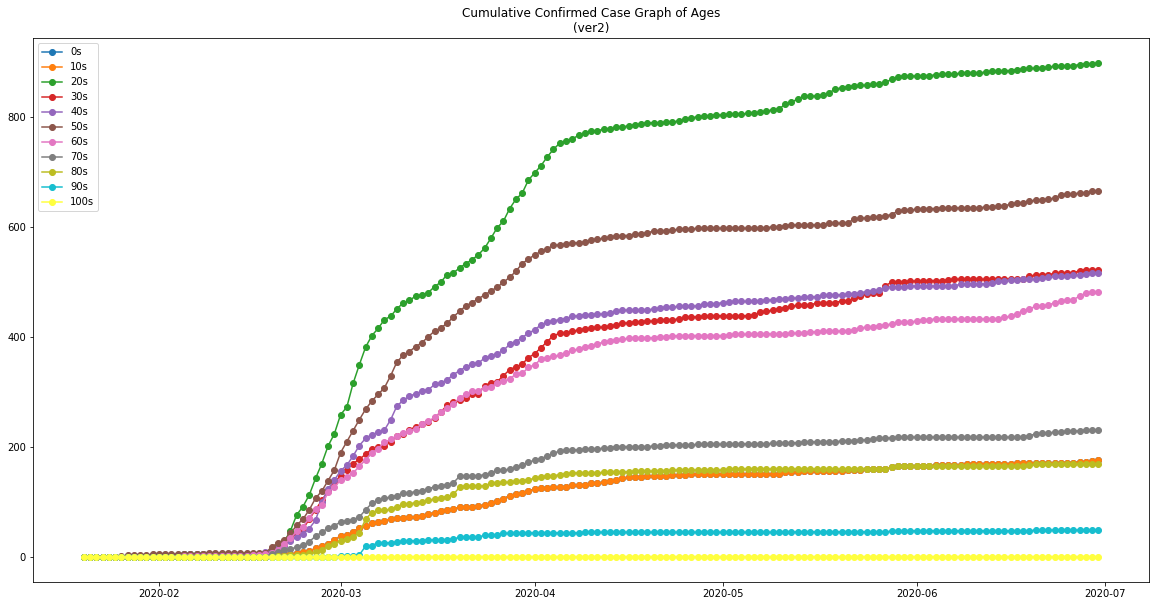

In [27]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
plt.title("""Cumulative Confirmed Case Graph of Ages\n""" """(ver2)""")

plt.plot(x_day,y_baby,marker='o',label='0s') ## 선그래프 생성
plt.plot(x_day,y_teen,marker='o',label='10s') 
plt.plot(x_day,y_twenty,marker='o',label='20s') 
plt.plot(x_day,y_thirty,marker='o',label='30s') 
plt.plot(x_day,y_fourty,marker='o',label='40s') 
plt.plot(x_day,y_fifty,marker='o',label='50s') 
plt.plot(x_day,y_sixty,marker='o',label='60s') 
plt.plot(x_day,y_sevty,marker='o',label='70s') 
plt.plot(x_day,y_eigty,marker='o',label='80s') 
plt.plot(x_day,y_nigty,marker='o',label='90s') 
plt.plot(x_day,y_hun,marker='o',label='100s', color='#ffff3f') 


plt.legend()
plt.show()